<a href="https://www.kaggle.com/code/hecshzye/suicide-rate-eda?scriptVersionId=90821080" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analysing & Predicting Suicide Rates Around The Globe

* The objective of this model is to predict the rate of suicide.
* Following the Exploratory Data Analysis, we will be using Regression models to predict.
* This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

# References

* United Nations Development Program (2018).
  Human development index (HDI). 
  fRetrieved from http://hdr.undp.org/en/indicators/137506

* World Bank (2018). World development indicators: GDP (current US$) by country:1985 to 2016. 
  Retrieved from http://databank.worldbank.org/data/source/world-development-indicators
  Suicide in the Twenty-First Century [dataset]. 
  Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook
  World Health Organization (2018). Suicide prevention. 
  Retrieved from http://www.who.int/mental_health/suicide-prevention/en/
  



# Bigger Picture & Objective

* Our unified effort to prevent suicide & loss of meaning in one's life.
* We have two ways to look at life: Optimistically/Pessimistically & Nihilistically.
* No one knows the meaning of life & the existential question is an open one.
* We can either be happy & cool about not knowing anything or unhappy about not knowing anything.
* Finding ways to cultivate cooperation & empathy among the population is necessary.

# If you know someone around you or close to you going through a difficult time, please reach out & be present.

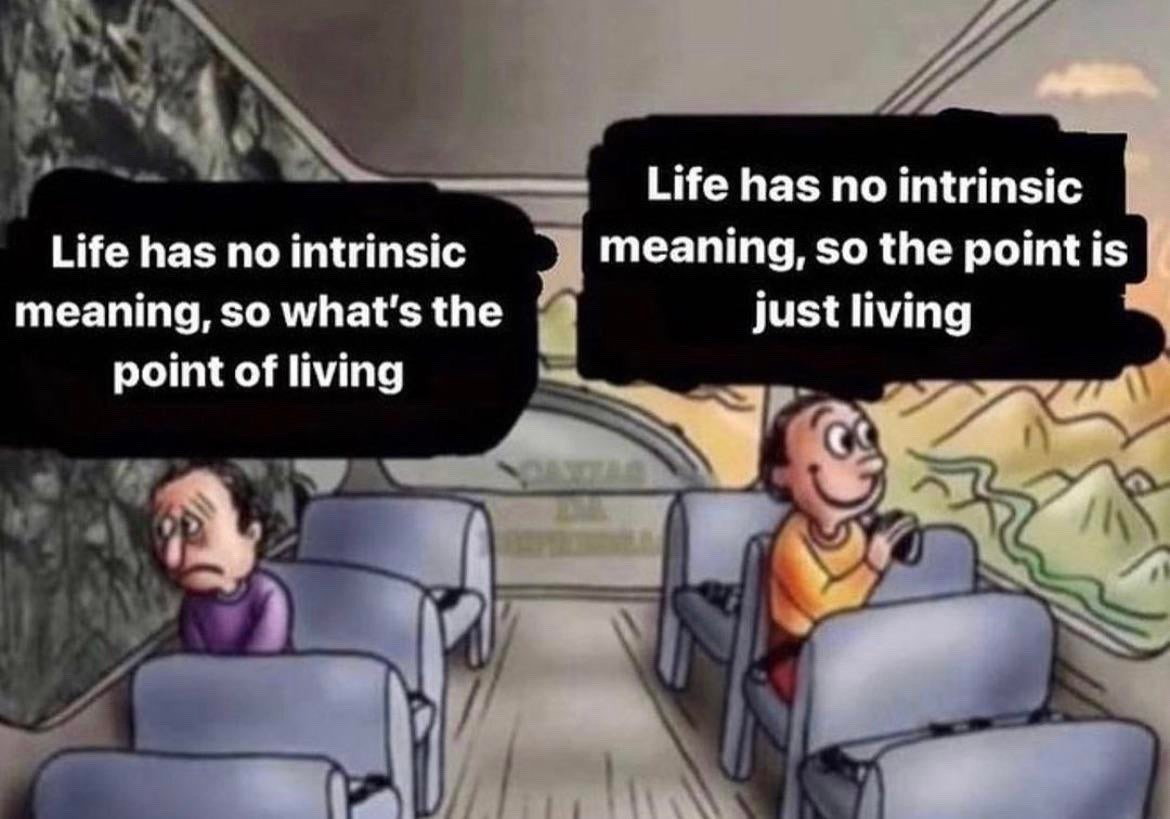

# Importing essential libraries 

In [31]:
# Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))        

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


# Exploratory Data Analysis 

In [32]:
# Create a DataFrame

df = pd.read_csv("/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv")

In [33]:
# Viewing the DataFrame
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [34]:
df.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [35]:
# Total number of rows 
len(df)

27820

In [36]:
df.shape

(27820, 12)

In [37]:
# Verifying missing values
df.isnull()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,False,False,False,False,False,False,False,False,False,False,False,False
27816,False,False,False,False,False,False,False,False,False,False,False,False
27817,False,False,False,False,False,False,False,False,False,False,False,False
27818,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
# Finding out null values
null_val = df.isnull()
for i in df.columns:
    print(i, end=", ")

country, year, sex, age, suicides_no, population, suicides/100k pop, country-year, HDI for year,  gdp_for_year ($) , gdp_per_capita ($), generation, 

In [39]:
for col in df.columns:
    print('nulls in '+col+' :', len(null_val[null_val[col]==True]))

nulls in country : 0
nulls in year : 0
nulls in sex : 0
nulls in age : 0
nulls in suicides_no : 0
nulls in population : 0
nulls in suicides/100k pop : 0
nulls in country-year : 0
nulls in HDI for year : 19456
nulls in  gdp_for_year ($)  : 0
nulls in gdp_per_capita ($) : 0
nulls in generation : 0


HDI has 19456 null values

To combat the case of 19456 null values in the HDI column (~ 70% null values), trying out a mannequin data set to explore before modelling.

In [40]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [41]:
df.replace(np.NaN,-99999.0,inplace=True)
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,-99999.0,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,-99999.0,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,-99999.0,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,-99999.0,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,-99999.0,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,-99999.0,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,-99999.0,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,-99999.0,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,-99999.0,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,-99999.0,"2,156,624,900",796,Generation X


In [42]:
# Converting the age column into non-categorical values
age = []
for i in df["age"]:
    age.append(i[:-6])
df["age"].value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [43]:
# Further converting various data types in "age"
age = ["5-14 years", "15-24 years", "25-42 years", "35-54 years", "55-74 years", "75+ years"]

j = 0
for i in df["age"]:
    df["age"].replace(i,j,inplace=True)
    j+=1
df["age"]    

0        13
1        15
2        13
3        12
4        19
         ..
27815    15
27816    12
27817    11
27818    11
27819    10
Name: age, Length: 27820, dtype: int64

In [44]:
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,13,21,312900,6.71,Albania1987,-99999.0,"2,156,624,900",796,Generation X
1,Albania,1987,male,15,16,308000,5.19,Albania1987,-99999.0,"2,156,624,900",796,Silent
2,Albania,1987,female,13,14,289700,4.83,Albania1987,-99999.0,"2,156,624,900",796,Generation X
3,Albania,1987,male,12,1,21800,4.59,Albania1987,-99999.0,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,19,9,274300,3.28,Albania1987,-99999.0,"2,156,624,900",796,Boomers
5,Albania,1987,female,12,1,35600,2.81,Albania1987,-99999.0,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,15,6,278800,2.15,Albania1987,-99999.0,"2,156,624,900",796,Silent
7,Albania,1987,female,19,4,257200,1.56,Albania1987,-99999.0,"2,156,624,900",796,Boomers
8,Albania,1987,male,10,1,137500,0.73,Albania1987,-99999.0,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,11,0,311000,0.00,Albania1987,-99999.0,"2,156,624,900",796,Generation X


In [45]:
# Removing the column "country-year" as it seems unnecessary data/repeated
df.drop("country-year", 1, inplace=True)
df.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,13,21,312900,6.71,-99999.0,"2,156,624,900",796,Generation X
1,Albania,1987,male,15,16,308000,5.19,-99999.0,"2,156,624,900",796,Silent
2,Albania,1987,female,13,14,289700,4.83,-99999.0,"2,156,624,900",796,Generation X
3,Albania,1987,male,12,1,21800,4.59,-99999.0,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,19,9,274300,3.28,-99999.0,"2,156,624,900",796,Boomers
5,Albania,1987,female,12,1,35600,2.81,-99999.0,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,15,6,278800,2.15,-99999.0,"2,156,624,900",796,Silent
7,Albania,1987,female,19,4,257200,1.56,-99999.0,"2,156,624,900",796,Boomers
8,Albania,1987,male,10,1,137500,0.73,-99999.0,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,11,0,311000,0.00,-99999.0,"2,156,624,900",796,Generation X


In [46]:
# Function for converting categorical data into numeric data

def categorical_data(df):
    columns = df.columns.values
    """
    Converts categorical values into numerical values
    
    """
    for column in columns:
        numeric_val = {}
        
        def converting_to_numerical(val):
            return numeric_val[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_vals = df[column].values.tolist()
            unique_val = set(column_vals)
            
            x = 0
            
            for unique in unique_val:
                if unique not in numeric_val:
                    numeric_val[unique] = x
                    
                    x += 1
                    
            df[column] = list(map(converting_to_numerical, df[column]))
    
    return df              

In [47]:
categorical_data(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,89,1987,0,13,21,312900,6.71,-99999.000,2165,796,4
1,89,1987,0,15,16,308000,5.19,-99999.000,2165,796,5
2,89,1987,1,13,14,289700,4.83,-99999.000,2165,796,4
3,89,1987,0,12,1,21800,4.59,-99999.000,2165,796,2
4,89,1987,0,19,9,274300,3.28,-99999.000,2165,796,0
...,...,...,...,...,...,...,...,...,...,...,...
27815,95,2014,1,15,107,3620833,2.96,0.675,2284,2309,4
27816,95,2014,1,12,9,348465,2.58,0.675,2284,2309,5
27817,95,2014,0,11,60,2762158,2.17,0.675,2284,2309,1
27818,95,2014,1,11,44,2631600,1.67,0.675,2284,2309,1


# Pre-Processing for modelling

In [48]:
# To prevent value errors

from sklearn import *

In [49]:
# Create X & y

X_df = df.drop("suicides_no", 1)
y_df = df["suicides_no"]

X_df.shape, y_df.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


((27820, 10), (27820,))

In [50]:
# Shuffle before the data splitting into training & testing dataset

np.random.seed(42)

df = df.sample(frac=1)
df.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
17437,92,2015,0,11,1,987750,0.10,-99999.000,2244,47206,1
23991,86,2001,1,12,31,222745,13.92,-99999.000,2048,912,5
8337,78,2013,1,15,19,748153,2.54,0.664,577,3885,4
21661,60,1987,1,12,0,1500,0.00,-99999.000,1722,1908,2
6235,27,2003,1,12,0,54020,0.00,-99999.000,463,4583,5
20326,59,1993,0,12,91,221700,41.05,-99999.000,2130,9479,2
1109,43,2002,0,13,5,293350,1.70,-99999.000,2177,788,3
24552,56,2002,0,13,78,533111,14.63,-99999.000,2261,31175,3
26109,21,1990,0,13,613,3544600,17.29,0.705,807,1698,4
13494,77,1995,0,11,43,7125500,0.60,0.838,1094,46043,3


In [51]:
# Splitting the data into Train & Test datasets

from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22256, 10) (5564, 10) (22256,) (5564,)


# Modelling (model_1)

In [52]:
# Using Linear Regression for modelling model_1

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

np.random.seed(42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Training accuracy
model_1.score(X_train, y_train)


0.4669979571517334

In [53]:
# Predicting with model_1

y_pred = model_1.predict(X_test)

In [54]:
# Metrics (R2 Score (r2), Mean Squared Error (MSE), Root Mean Squared Error (RMSE))

print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2 : ", 1 - r2_score(y_test, y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE :  375147.05535230413
r2 :  0.4960515356576676
RMSE :  612.4924941191558


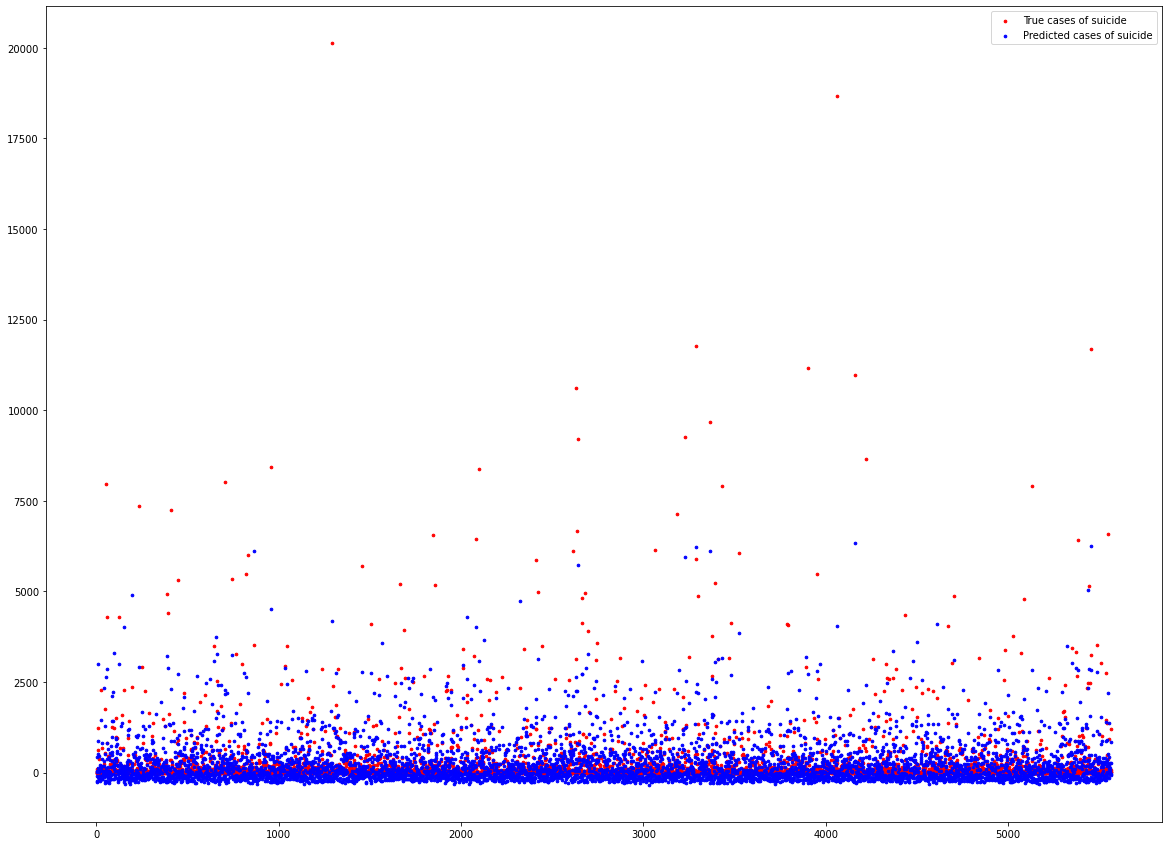

In [55]:
# Plotting the validation for model_1 (Linear Regression model)
np.random.seed(42)

fig, ax = plt.subplots(figsize=(20, 15))
a = np.arange(1, len(y_test) + 1, 1)
plt.scatter(a, y_test, label = "True cases of suicide", s=7, color="red")
plt.legend()
plt.scatter(a, y_pred, label = "Predicted cases of suicide", s=7, color="blue")
plt.legend()
plt.show();

# Modelling (model_2)

In [56]:
# model_2 using Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)
model_2.score(X_train, y_train)

0.999253446894897

In [57]:
# Prediction on test data

y_pred = model_2.predict(X_test)

In [58]:
# Metrics for evaluation
from math import sqrt

print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2 Score: ", 1-r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE :  5814.208211125089
r2 Score:  0.007688043583478188
RMSE:  76.25095547680101


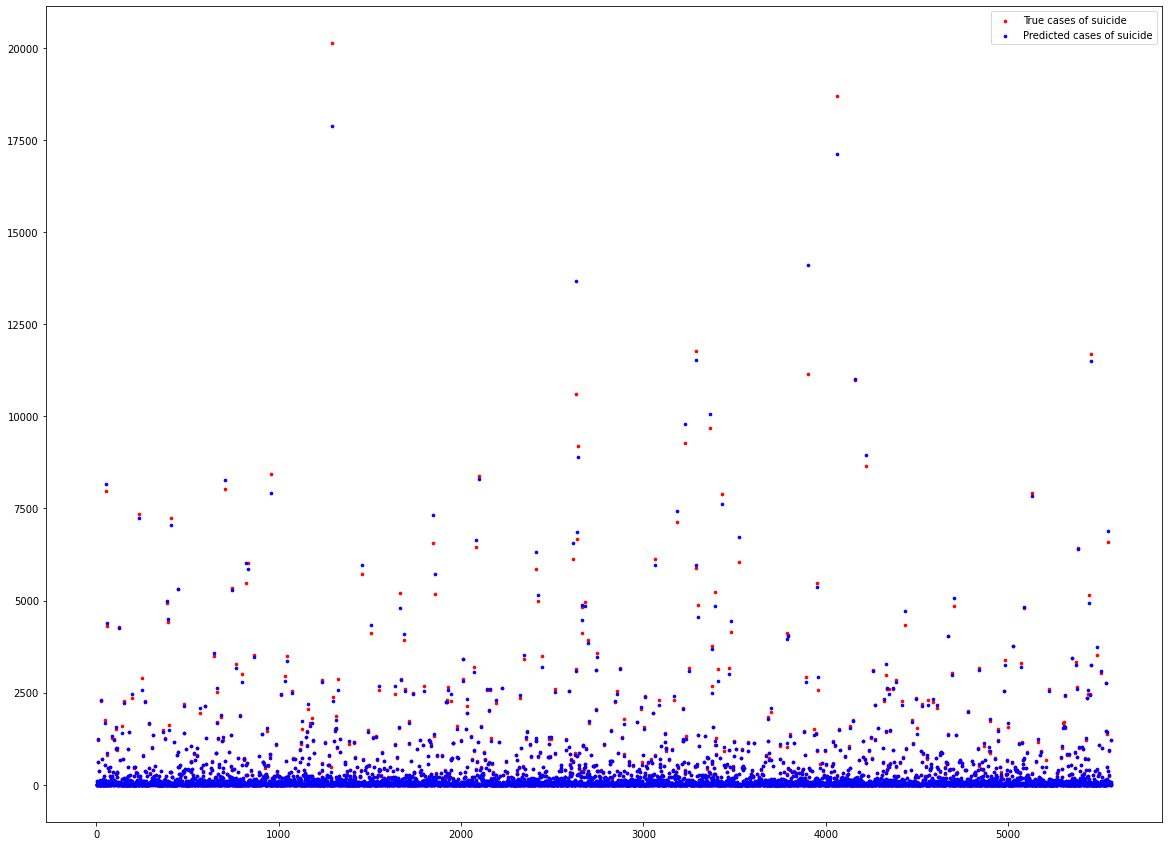

In [59]:
# Plotting the predictions

np.random.seed(42)

fig, ax = plt.subplots(figsize=(20, 15))
plt.scatter(a, y_test, label = "True cases of suicide", s=7, color="red")
plt.legend()
plt.scatter(a, y_pred, label = "Predicted cases of suicide", s=7, color="blue")
plt.legend()
plt.show();

# Pedicting without the "HDI for year" column

### Removing the "HDI for year" column could be benificial since it contains about 70% of null data.

In [61]:
# Modelling model_3 without "HDI for year" column

X_train3 = X_train.drop("HDI for year", 1)
X_test3 = X_test.drop("HDI for year", 1)

# Using Random Forest Regressor
model_3 = RandomForestRegressor()

# Fit the model
model_3.fit(X_train3, y_train)

# Score
model_3.score(X_train3, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


0.9993013657165919

#### model_3 has a training accuracy of 99.9227%

In [62]:
# To avoid possible value error 

from sklearn import *

# Predicting with model_3

y_pred = model_3.predict(X_test_3) 

In [63]:
# Metrics for evaluation
from math import sqrt

print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2 Score: ", 1-r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE :  5649.7600005391805
r2 Score:  0.007470596088600012
RMSE:  75.16488542224475


# Conclusion

* model_1 with Linear Regression

  - accuracy : 46.9%
  - MSE :  373662.16998576623
  - r2 :  0.49408809317334645
  - RMSE :  611.2791260837935
  
  
* model_2 with Random Forest Regression 

  - accuracy : 99.925%
  - MSE :  5814.208211125089
  - r2 Score:  0.007688043583478188
  - RMSE:  76.25095547680101
  
  
* model_3 with Random Forest Regression (without "HDI for year" column)

  - accuracy : 99.930%
  - MSE :  5649.7600005391805
  - r2 Score:  0.007470596088600012
  - RMSE:  75.16488542224475


Note: The dataset isn't great observing that it is incomplete & about 70% data missing in the "HDI for year" column which is crucial for predicting suicide rate by analyzing the "Human Development Index for a year" which could be a major attribute when predicting the overall development index of a country